# Bayesian Database Search API Tutorial

This notebook will walk through what types of problems the Bayesian Database Search API can be applied to, and how the API is used, within the context of US demographic and election data at the county level.  There are six sections to this notebook:

1. <b>A simple example.</b>  The first thing we'll do is introduce the three main situations our API can help with, in a small, constrained problem.  The hope is that this brief overview will give you a framework for thinking about the capabilities of the API before we dive into the details.
1. <b>Setup.</b>  Next, we'll make sure that our environments are setup in a way that give us access to the required package and dependencies to run the Bayesian Database Search API.
1. <b>An overview of the data we'll be working with.</b> Now that we're all setup with the required dependencies we'll get a brief overview of the data that we'll be analyzing in this workbook: county-level census data, combined with a few additional data sources, most of which are related to the 2016 US election results.
1. <b>Finding predictively relevant columns.</b>  After we're familiar with the data that we'll be using, we'll start showing some of the benefits of the API by using it find what types of attributes of a county end up being predictive of supporting Trump.
1. <b>Finding anomalies.</b> Next, we'll use the APIs ability to find anomalies in larger datasets to see if we can find exceptions to the patterns we discovered.
1. <b>Finding similar rows.</b> And finally we'll use the API's ability to find counties similar to ones that are interesting to us.

You do not need to have a PhD in statistics to get value out of this tutorial, but it will be most helpful to people who have working knowledge of:

* Python and Jupyter notebooks
* Github
* How to issue http requests to an API
* SQL syntax

And if you have feedback - positive or negative - please don't hesitate to get in touch with Tim over email at tct@mit.edu.

## Section 1: A Simple Example

The Bayesian Database Search API can run three main queries at present:
* Find Anomalies
* Find Similar Rows
* Find Dependent Columns

You might be asking yourself "when would I want to use these queries?"  To answer this question let's illustrate how each of these queries would work within the context of a fictitious dataset.  Lets say this dataset has 10,000 rows, each of which is a person, and four columns: person_id, age, max_running_speed, and favorite color.  Let's see what our queries could do with a datset like this.

### Find Anomalies

Let's say that you'd like to find - of all 10,000 people - which person stands out the most in terms of their `max_running_speed`, or in other words is "anomalous" in terms of their running speed.  How would you do this?

Well, one way you might go about this is to take the average max running speed of all people in your list and find the person who is furthest from this average on either end.  Make sense?  This probably isn't a revolutionary technique to you.

But now let's say that we'd like to find a person stands out in terms of their running speed, given their age.  How might we figure this out?  Well, problems like these - referred to as a multivariate problem - can be difficult, especially as they increase in their complexity.  And this is where the "Find Anomalies" query of the Bayesian Database Search API can be helpful.  It lets you indicate which column you'd like to "search for anomalousness", and which column(s) you'd like to take into consideration as context (in this example, age), and - voila - suddenly you have a way of spotting the 100 year old marathon runner and 5 year old future track star.

### Find Similar Rows

Now let's say there is a certain person in this list who is of interest to you for one reason or another, and you'd like to find more people like this.  To be specific in our example, let's say this person has the following characteristics:

* `person_id`: 12931249
* `age`: 14
* `max_running_speed`: 13 (mph)
* `favorite_color`: blue

(And, for context, the world record running speed is 27.8 mph, set by Usain Bolt in the 100 meter sprint in August of 2009.)

So, we have a fairly average (in terms of `max_running_speed`) `14` year old whose favorite color is `blue`, and we'd like to find more people like this.  Within the context of the constrained set of columns this might be pretty easy.  We could use filters in a spreadsheet to filter out people with these characteristics or construct a SQL query with `WHERE` statements that specify these exact characteristics.

But now let's imagine we add 300 columns with additional information about each person.  Suddenly our techniques for finding people who are similar get a lot more burdensome.  This is a scenario where our "Find Similar Rows" query can be of help.  It lets you indicate which row is of particular interest to you, and it will send you back a ranking that indicates which rows are most similar to the row you indicated.

### Find Dependent Columns

Ok, now finally let's say that we want to find which columns the `max_running_speed` column appears to depend on the most.  Or, in other words, given the `max_running_speed` of all 10,000 people in our dataset, are there relationships between all of our columns?  For our simple example, we would see a strong relationship between a person's `age` and their `max_running_speed`: generally, we would expect people to get faster in life until somewhere around the age of 21, and then there is a decrease in their maximum running speed over time.  And, on the other hand, we would expect for there to relationship between a person's `favorite_color` and their `max_running_speed`.

Again, in our simple example, one's "gut" might do a pretty good job of identifying these relationships, but as the size and complexity of our data grows, the ability of this API to do this becomes more and more valuable.

### A Summary of the Value of this API

This API is most helpful in analyzing large, messy, multivariate datasets with missing values.  In each of the examples laid out above, the API's ability to provide answers scales with increasing size, complexity, and messiness of our data, which would otherwise require trained data scientists hours of work.

## Section 2: Getting setup

To get setup we need:

1. Docker installed
1. Local access to relevant repos
1. A .bdb file with relevant data
1. A properly-configured, running Bayesian Database Search API server
1. A running NGINX server
1. A running Bayesian Database Search API server

### Getting Docker installed



### Gaining local access to the relevant repos

You'll need to clone this nginx-proxy repo:
`https://github.com/probcomp/nginx-proxy`

And you'll need to clone this repo with the API:

`https://github.com/probcomp/bayesrest`

### Gaining access to a .bdb file with relevant data

We must first download the .bdb file that we'll be using.

Then we must place the .bdb file within our Bayesian Database Search API directory.

### Configuring your Bayesian Database Search API

To get our Bayesian Database Search API properly configured, create a file named `application.cfg` and open it using your text editor of choice.

To get up and running, we're going to change the values for the following variables:

* The value for the `BDB_FILE` variable should be changed to `counties_cgpm.bdb `
* The value for the `TABLE_NAME` variable should be edited to `counties`
* The value for the `POPULATION_NAME` variable should be edited to `counties`

### Getting your NGINX server up and running

Using your terminal, navigate into the directory that you've cloned down from Github.  Once in the directory, start your docker container by running:

`docker-compose up`

### Getting your Bayesian Database Search API up and running

We're going to do the same as we did to get our NGINX server up and running -- in a separate terminal window, navigate into the Bayesian Database Seach API directory and run the following command:

`docker-compose up`

Once we think we have our server up and running, let's make sure that it's working as expected by issuing a request against it:

In [ ]:
import requests
r = requests.get('http://0.0.0.0:5000/heartbeat',())
r.status_code

If you've received a `200` status code then your API should be up and running

## Section 3: An overview of the data we'll be working with

Ok, now we get to start looking at our data.  Let's start by looking at a subset -- both in terms of columns and rows.  We'll do this by calling our `/table-data` endpoint with a standard http `GET` request.  As a response, we should receive a JSON object with two properties: a `columns` property, which has an array of column names, and a `data` property, which has an array of arrays -- and each inner-array has values that correspond to each column of the corresponding index.

Don't worry if that last sentence seemed a little dense -- we can use the `DataFrame` method from the frequently-used Python library named Pandas to show this data in a format we're used to:

In [2]:
import pandas as pd
fips_col_name = 'state_county_fips'
value_col_name = 'Population'

r = requests.get('http://0.0.0.0:5000/table-data',())
resp = r.json()

bayesrest_data_frame = pd.DataFrame(data=resp['data'], columns=resp['columns'])
bayesrest_data_frame

,Location,County,State,state_county_fips,state_fips,county_fips,Opioid_Deaths,Population,Opioid_Deaths_Crude_Rate (per 100000),Clinton 2016,...,Population for whom poverty status Is determined: Under 2.00 (Poor or struggling),Population for whom poverty status Is determined: 2.00 and Over (Doing ok),Black or African American Alone Population for whom&nbsp; poverty status Is determined: Income below poverty level,Hispanic or Latino Population for whom poverty status Is determined: Income below poverty level,Total Population: Native Born,Total Population: Foreign Born,Total Population: Foreign Born: Naturalized Citizen,Total Population: Foreign Born: Not a Citizen,Percentage: No Health Insurance Coverage (calc.),rowid
0,"Autauga County, Alabama",Autauga County,Alabama,1001,1,1,523.0,55347.0,944.9,5936.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,"Baldwin County, Alabama",Baldwin County,Alabama,1003,1,3,2092.0,203709.0,1027,18458.0,...,63581.0,136959.0,0.0,0.0,198551.0,5158.0,1903.0,749.0,8.1,2
2,"Barbour County, Alabama",Barbour County,Alabama,1005,1,5,295.0,26489.0,1113.7,4871.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,"Bibb County, Alabama",Bibb County,Alabama,1007,1,7,238.0,22583.0,1053.9,1874.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,"Blount County, Alabama",Blount County,Alabama,1009,1,9,613.0,57673.0,1062.9,2156.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
5,"Bullock County, Alabama",Bullock County,Alabama,1011,1,11,120.0,10696.0,1121.9,3530.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
6,"Butler County, Alabama",Butler County,Alabama,1013,1,13,255.0,20154.0,1265.3,3726.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
7,"Calhoun County, Alabama",Calhoun County,Alabama,1015,1,15,1484.0,115620.0,1283.5,13242.0,...,48980.0,63573.0,9648.0,0.0,112265.0,3355.0,1709.0,510.0,8.9,8
8,"Chambers County, Alabama",Chambers County,Alabama,1017,1,17,438.0,34123.0,1283.6,5784.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
9,"Cherokee County, Alabama",Cherokee County,Alabama,1019,1,19,345.0,25859.0,1334.2,1547.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10


If everything is working properly, you should see a subset of your data in a table with the around 20 columns and around 100 rows.  You'll notice that we have identifying information about each row (county) in the first few columns, followed by information about that county.  Importantly, though, notice that we don't have values associated with each county.  Unfortunately this is pretty typical for datasets that cover the US, since the source of the data often varies from state to state, but - as mentioned in the simple example above - we should still expect our API to be able to handle this much better than typical methods.

But before we move forward let's take a minute to make sure we understand all the columns in our dataset.  There are about 140 of them, so it should take a minute or two, but it'll be helpful context for us.  We'll do this by taking the DataFrame we built from the API above, and list out all of its columns:

In [3]:
list(bayesrest_data_frame.columns.values)

[u'Location',
 u'County',
 u'State',
 u'state_county_fips',
 u'state_fips',
 u'county_fips',
 u'Opioid_Deaths',
 u'Population',
 u'Opioid_Deaths_Crude_Rate (per 100000)',
 u'Clinton 2016',
 u'Trump 2016',
 u'Total votes 2016',
 u'Clinton% 2016',
 u'Trump% 2016',
 u'Increase in Incumbent Party Vote Share (2012-2016) (calc.)',
 u'Obama 2012',
 u'Romney 2012',
 u'Total votes 2012',
 u'Obama% 2012',
 u'Romney% 2012',
 u'Dem AVG',
 u'Rep AVG',
 u'Dem% AVG',
 u'Rep% AVG',
 u'Physically Unhealthy Days per Month (Persons 18 Years and Over)',
 u'Mentally Unhealthy Days per Month (Persons 18 Years and Over)',
 u'Percent of Adults That Report Fair or Poor Health (Persons 18 Years and Over)',
 u'Percent of Low Birthweight Births (<2.5kg)',
 u'Primary Care Physicians (PCP) Rate per 100000 Population',
 u'Mental Health Providers (MHP) Rate per 100000 Population',
 u'Dentists Rate per 100000 Population',
 u'Percent Adults with Limited Access to Doctor Due to Costs',
 u'Percent of Persons Without Insu

When I look through this list there are a few groupings of columns that stick out to me.  Some of them are:

* Identifying information about the county (e.g. `state_county_fips`)
* Total population
* Election results (e.g. `Clinton 2016`)
* Public health metrics (e.g. `Primary Care Physicians pRate per 100000 Population`)
* Health insurance coverage
* Crime statistics (e.g. `Total Violent Crimes Rate (per 100000 Population)`)
* Drug use (e.g. `Opioid_Deaths`)
* Demographic (e.g. `Percent Population: Black or African American Alone (calc.)`)
* Education
* Income

Alright, great!  Viewing data in a table and looking through all the columns is a helpful way to get a sense of what data is available.  But there's one last tool we can use to get more familiar with our dataset: mapping.  Let's use the Plotly python package to map Population below, and feel free to tinker with the inputs to map other variables like education or income.

In [36]:
""" 

NOT YET OPERABLE WITH CURRENT FILE

import plotly.plotly as py
import plotly.figure_factory as ff

import numpy as np

fips_col_name = 'state_county_fips'
value_col_name = 'Population'

r = requests.get('http://0.0.0.0:5000/table-data',())
resp = r.json()
data = resp['data']

fips_index = resp['columns'].index(fips_col_name)
value_index = resp['columns'].index(value_col_name)

fips = []
values = []

for line in data:
    fips.append(line[fips_index])
    values.append(line[value_index])

colorscale = ["#f7fbff","#ebf3fb","#deebf7","#d2e3f3","#c6dbef","#b3d2e9","#9ecae1",
              "#85bcdb","#6baed6","#57a0ce","#4292c6","#3082be","#2171b5","#1361a9",
              "#08519c","#0b4083","#08306b"]
endpts = list(np.linspace(1, 770292, len(colorscale) - 1))

fig = ff.create_choropleth(
    fips=fips, values=values,
    binning_endpoints=endpts,
    colorscale=colorscale,
    show_state_data=False,
    show_hover=True, centroid_marker={'opacity': 0},
    asp=2.9, title='Population',
    legend_title='People'
)
py.iplot(fig, filename='choropleth_full_usa')

# Original map: 
import plotly.plotly as py
import plotly.figure_factory as ff

import numpy as np

df_sample = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/laucnty16.csv')
df_sample['State FIPS Code'] = df_sample['State FIPS Code'].apply(lambda x: str(x).zfill(2))
df_sample['County FIPS Code'] = df_sample['County FIPS Code'].apply(lambda x: str(x).zfill(3))
df_sample['FIPS'] = df_sample['State FIPS Code'] + df_sample['County FIPS Code']

colorscale = ["#f7fbff","#ebf3fb","#deebf7","#d2e3f3","#c6dbef","#b3d2e9","#9ecae1",
              "#85bcdb","#6baed6","#57a0ce","#4292c6","#3082be","#2171b5","#1361a9",
              "#08519c","#0b4083","#08306b"]
endpts = list(np.linspace(1, 12, len(colorscale) - 1))
fips = df_sample['FIPS'].tolist()
values = df_sample['Unemployment Rate (%)'].tolist()

fig = ff.create_choropleth(
    fips=fips, values=values,
    binning_endpoints=endpts,
    colorscale=colorscale,
    show_state_data=False,
    show_hover=True, centroid_marker={'opacity': 0},
    asp=2.9, title='USA by Unemployment %',
    legend_title='% unemployed'
)
py.iplot(fig, filename='choropleth_full_usa')
"""

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~tctrautman/0 or inside your plot.ly account where it is named 'choropleth_full_usa'


' Original map: \nimport plotly.plotly as py\nimport plotly.figure_factory as ff\n\nimport numpy as np\n\ndf_sample = pd.read_csv(\'https://raw.githubusercontent.com/plotly/datasets/master/laucnty16.csv\')\ndf_sample[\'State FIPS Code\'] = df_sample[\'State FIPS Code\'].apply(lambda x: str(x).zfill(2))\ndf_sample[\'County FIPS Code\'] = df_sample[\'County FIPS Code\'].apply(lambda x: str(x).zfill(3))\ndf_sample[\'FIPS\'] = df_sample[\'State FIPS Code\'] + df_sample[\'County FIPS Code\']\n\ncolorscale = ["#f7fbff","#ebf3fb","#deebf7","#d2e3f3","#c6dbef","#b3d2e9","#9ecae1",\n              "#85bcdb","#6baed6","#57a0ce","#4292c6","#3082be","#2171b5","#1361a9",\n              "#08519c","#0b4083","#08306b"]\nendpts = list(np.linspace(1, 12, len(colorscale) - 1))\nfips = df_sample[\'FIPS\'].tolist()\nvalues = df_sample[\'Unemployment Rate (%)\'].tolist()\n\nfig = ff.create_choropleth(\n    fips=fips, values=values,\n    binning_endpoints=endpts,\n    colorscale=colorscale,\n    show_state_da

Now hopefully you're feeling like you have a good sense of what data we have available for analysis.  Next we're going to dive into the first query we're going to use -- finding predictively relevant columns.

## Section 4: Finding predictively relevant columns

Alright, now we're going to use the first of the main query types that our API can make: <b>finding predictively relevant columns to an outcome we care about</b>

To be able to run this query the main thing we need to do is to identify a column that represents an outcome we care about.

We're primarily going to explore US Presidential election data, so the main outcome we care about is the degree to which people in each county voted for Donald Trump or Hillary Clinton.  This outcome is represented in our data in a few different ways - we're going to start by querying the `"Clinton% 2016"` column.

If all goes as expected, we'd expect the result of this query to predicitvely relevant columns that would include education level of the population, race of the population, and the degree to which the county voted for a Democrat or Republican in past elections.  Let's see what we get:

In [23]:
payload={'column': 'Clinton% 2016'}
headers={'content-type': 'application/json'}

r = requests.post('http://0.0.0.0:5000/find-associated-columns', json=payload, headers=headers)
find_assoc_col_1_resp = r.json()
find_assoc_col_1_resp

[u'Clinton% 2016']

Now let's see if we get similar results when we try to find predictively relevant columns for another column that shows the same information, represented a different way.  This time we'll use the `"Trump% 2016"` column.

In [24]:
payload={'column': 'Trump% 2016'}
headers={'content-type': 'application/json'}

r = requests.post('http://0.0.0.0:5000/find-associated-columns', json=payload, headers=headers)
find_assoc_col_2_resp = r.json()
find_assoc_col_2_resp

[u'Trump% 2016']

And, once more, let's see what columns are indicated as predictvely relevant when we query a column like `Romney% 2012`:

In [25]:
payload={'column': 'Romney% 2016'}
headers={'content-type': 'application/json'}

r = requests.post('http://0.0.0.0:5000/find-associated-columns', json=payload, headers=headers)
find_assoc_col_3_resp = r.json()
find_assoc_col_3_resp

[u'Romney% 2016']

Great, now we can see that similar columns are predicting each of these outcomes, which makes sense.  We would expect that the same columns would predict the percent of a county that voted for Clinton, and the percent of a county that voted for Trump since - by and large - these two columns are the inverse of each other.  And to the extent that there are differences in the what columns predict the percent of a county that voted for Romney in 2012, we should be able to see an e

#### A few questions:
1. asdfasdf

## Section 5: Finding anomalies

Ok, so now that we've seen how to find columns that are predictively relevant, let's see how we can find rows that stand out as anomalies.  We've seen in the previous section that a column that `Population 25 Years and Over: Some college or More` has predictive relevance to the `Clinton% 2016` column, but can we find counties for which that isn't true?  Let's give it a shot with the query below -- note that this one might take a little while to run.

In [39]:
payload={'target-column': 'Opioid_Deaths', 'context-columns': ['Population']}
headers={'content-type': 'application/json'}

r = requests.post('http://0.0.0.0:5000/find-anomalies', json=payload, headers=headers)
print r
#bayesrest_data_frame = pd.DataFrame(data=resp, columns=['row_id', 'score'])

<Response [200]>


If you received a response saying `<Response [200]>` then your query ran successfully -- we just need to go get the results.  We can hit the `/anomaly-scatterplot-data` to get our results back in a format that let us put them in a scatterplot:

In [40]:
r = requests.get('http://0.0.0.0:5000/anomaly-scatterplot-data',())
anomaly_scatterplot_resp = r.json()
# I still need to figure out how to present the response in a scatter plot
anomaly_scatterplot_resp

[[88, None],
 [93, None],
 [270, None],
 [283, None],
 [299, None],
 [547, None],
 [562, None],
 [566, None],
 [1602, None],
 [1615, None],
 [1631, None],
 [1655, None],
 [1656, None],
 [1657, None],
 [1690, None],
 [1695, None],
 [1704, None],
 [1709, None],
 [1710, None],
 [1711, None],
 [1735, None],
 [1738, None],
 [1744, None],
 [1750, None],
 [1992, None],
 [2032, None],
 [2391, None],
 [2608, None],
 [2652, None],
 [2653, None],
 [2656, None],
 [2672, None],
 [2677, None],
 [2719, None],
 [2737, None],
 [2915, None],
 [203, 8.76599478360746e-35],
 [71, 1.7750595790262516e-17],
 [186, 1.7750595790262516e-17],
 [1805, 1.7750595790262516e-17],
 [2397, 1.7750595790262516e-17],
 [2538, 1.7750595790262516e-17],
 [2639, 1.7750595790262516e-17],
 [1427, 1.7787359754501222e-17],
 [2030, 1.7787359754501222e-17],
 [2419, 1.7787359754501222e-17],
 [1648, 1.782419855427838e-17],
 [1751, 1.782419855427838e-17],
 [2636, 1.782419855427838e-17],
 [74, 1.7861112339226063e-17],
 [272, 1.7861112339

And now let's view the response in a scatter plot:

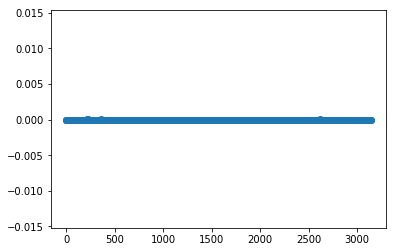

In [43]:
# This is obviously not what a scatterplot should look like -- this needs to be replaced with real code
import matplotlib
import matplotlib.pyplot as plt

rowids = []
values = []

for pair in anomaly_scatterplot_resp:
    rowids.append(pair[0])
    values.append(pair[1])

plt.scatter(rowids, values)
plt.show()

#### A few questions:

1. 

## Section 6: Finding similar rows


Now the final query type that we'll use is from that of the `/find-peers` endpoint with respect to a column we care about.  Let's use it to find counties that are similar to some of the outliers we identified in the last section.

In [46]:
payload={'target-row': 7, 'context-column': 'Opioid_Deaths'}
headers={'content-type': 'application/json'}

r = requests.post('http://0.0.0.0:5000/find-peers', json=payload, headers=headers)
find_peers_resp = r.json()
find_peers_resp

[[7, 1.0],
 [1280, 1.0],
 [1, 0.0],
 [2, 0.0],
 [3, 0.0],
 [4, 0.0],
 [5, 0.0],
 [6, 0.0],
 [8, 0.0],
 [9, 0.0],
 [10, 0.0],
 [11, 0.0],
 [12, 0.0],
 [13, 0.0],
 [14, 0.0],
 [15, 0.0],
 [16, 0.0],
 [17, 0.0],
 [18, 0.0],
 [19, 0.0],
 [20, 0.0],
 [21, 0.0],
 [22, 0.0],
 [23, 0.0],
 [24, 0.0],
 [25, 0.0],
 [26, 0.0],
 [27, 0.0],
 [28, 0.0],
 [29, 0.0],
 [30, 0.0],
 [31, 0.0],
 [32, 0.0],
 [33, 0.0],
 [34, 0.0],
 [35, 0.0],
 [36, 0.0],
 [37, 0.0],
 [38, 0.0],
 [39, 0.0],
 [40, 0.0],
 [41, 0.0],
 [42, 0.0],
 [43, 0.0],
 [44, 0.0],
 [45, 0.0],
 [46, 0.0],
 [47, 0.0],
 [48, 0.0],
 [49, 0.0],
 [50, 0.0],
 [51, 0.0],
 [52, 0.0],
 [53, 0.0],
 [54, 0.0],
 [55, 0.0],
 [56, 0.0],
 [57, 0.0],
 [58, 0.0],
 [59, 0.0],
 [60, 0.0],
 [61, 0.0],
 [62, 0.0],
 [63, 0.0],
 [64, 0.0],
 [65, 0.0],
 [66, 0.0],
 [67, 0.0],
 [68, 0.0],
 [69, 0.0],
 [70, 0.0],
 [71, 0.0],
 [72, 0.0],
 [73, 0.0],
 [74, 0.0],
 [75, 0.0],
 [76, 0.0],
 [77, 0.0],
 [78, 0.0],
 [79, 0.0],
 [80, 0.0],
 [81, 0.0],
 [82, 0.0],
 [83, 0.0],

We can view this data in a heatmap.

In [47]:
r = requests.get('http://0.0.0.0:5000/peer-heatmap-data',())
peer_heatmap_resp = r.json()
peer_heatmap_resp

[[[1, 1, 1.0],
  [1, 2, 0.0],
  [1, 3, 0.0],
  [1, 4, 0.0],
  [1, 5, 0.0],
  [1, 6, 0.0],
  [1, 7, 0.0],
  [1, 8, 0.0],
  [1, 9, 0.0],
  [1, 10, 0.0],
  [1, 11, 0.0],
  [1, 12, 0.0],
  [1, 13, 0.0],
  [1, 14, 0.0],
  [1, 15, 0.0],
  [1, 16, 0.0],
  [1, 17, 0.0],
  [1, 18, 0.0],
  [1, 19, 0.0],
  [1, 20, 0.0],
  [1, 21, 0.0],
  [1, 22, 0.0],
  [1, 23, 0.0],
  [1, 24, 0.0],
  [1, 25, 0.0],
  [1, 26, 0.0],
  [1, 27, 0.0],
  [1, 28, 0.0],
  [1, 29, 0.0],
  [1, 30, 0.0],
  [1, 31, 0.0],
  [1, 32, 0.0],
  [1, 33, 0.0],
  [1, 34, 0.0],
  [1, 35, 0.0],
  [1, 36, 0.0],
  [1, 37, 0.0],
  [1, 38, 0.0],
  [1, 39, 0.0],
  [1, 40, 0.0],
  [1, 41, 0.0],
  [1, 42, 0.0],
  [1, 43, 0.0],
  [1, 44, 0.0],
  [1, 45, 0.0],
  [1, 46, 0.0],
  [1, 47, 0.0],
  [1, 48, 0.0],
  [1, 49, 0.0],
  [1, 50, 0.0],
  [1, 51, 0.0],
  [1, 52, 0.0],
  [1, 53, 0.0],
  [1, 54, 0.0],
  [1, 55, 0.0],
  [1, 56, 0.0],
  [1, 57, 0.0],
  [1, 58, 0.0],
  [1, 59, 0.0],
  [1, 60, 0.0],
  [1, 61, 0.0],
  [1, 62, 0.0],
  [1, 63, 0.0],
 

#### A few questions:
1. 